In [9]:
#Import modules
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Create DataFrame
Grc_df = pd.read_csv('data/Grocery_Dataset.csv')

# Task 1
# First 10 rows
Grc_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [10]:
# Task 1
# Last 10 rows
Grc_df.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4990,FDE46,18.60,Low Fat,0.015859,Snack Foods,152.9366,OUT017,2007,NaN,Tier 2,Supermarket Type1,453.4098
4991,NCQ53,17.60,Low Fat,0.018905,Health and Hygiene,234.6590,OUT046,1997,Small,Tier 1,Supermarket Type1,8508.9240
4992,NCN42,20.25,Low Fat,0.014281,Household,148.0418,OUT018,2009,Medium,Tier 3,Supermarket Type2,1177.1344
4993,DRH11,5.98,Low Fat,0.075675,Hard Drinks,53.3614,OUT049,1999,Medium,Tier 1,Supermarket Type1,331.5684
4994,NCI42,18.75,Low Fat,0.010382,Household,207.8954,OUT049,1999,Medium,Tier 1,Supermarket Type1,2292.3494
4995,FDT07,5.82,Regular,0.077476,Fruits and Vegetables,255.3330,OUT045,2002,NaN,Tier 2,Supermarket Type1,4870.3270
4996,DRL60,8.52,Low Fat,0.027059,Soft Drinks,153.3682,OUT046,1997,Small,Tier 1,Supermarket Type1,914.8092
4997,FDG20,15.50,Regular,0.126200,Fruits and Vegetables,178.4028,OUT018,2009,Medium,Tier 3,Supermarket Type2,1239.7196
4998,FDF56,16.70,Regular,0.119462,Fruits and Vegetables,182.7976,OUT046,1997,Small,Tier 1,Supermarket Type1,1810.9760
4999,FDV33,9.60,Regular,0.027455,Snack Foods,258.1304,OUT018,2009,Medium,Tier 3,Supermarket Type2,2324.9736


In [7]:
# Task 2
# Number of null values in the column
Grc_df.isna().sum()

Item_Identifier                 0
Item_Weight                   818
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1439
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
print('Percent missing in "Item_Weight" column: %.2f%%' %((Grc_df['Item_Weight'].isnull().sum()/Grc_df.shape[0])*100))
print('Percent missing in "Outlet_Size" column: %.2f%%' %((Grc_df['Outlet_Size'].isnull().sum()/Grc_df.shape[0])*100))

Percent missing in "Item_Weight" column: 16.36%
Percent missing in "Outlet_Size" column: 28.78%


In [13]:
# Find median item weight
print('Median of "Item_Weight" is %.2f' %(Grc_df["Item_Weight"].median(skipna=True)))

Median of "Item_Weight" is 12.80


In [14]:
# Fill missing Item_Weight values with median weight.
Grc_df["Item_Weight"] = Grc_df["Item_Weight"].fillna(Grc_df["Item_Weight"].median())

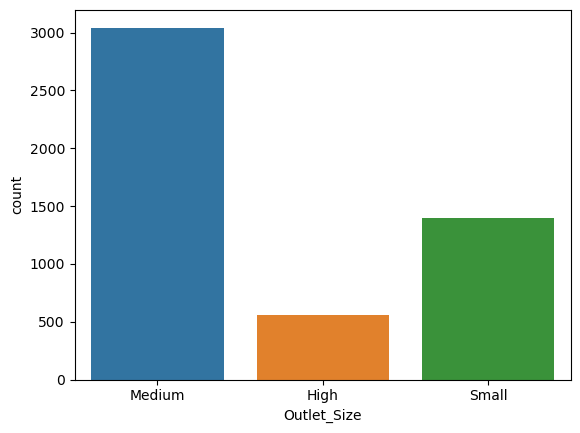

In [19]:
# Find most common value in Outlet_Size, completes both tasks 2 and 3.
# 3 Outlet sizes, small is minimum, high is maximum.
sns.countplot(x='Outlet_Size', data=Grc_df, hue='Outlet_Size')
plt.show()

In [18]:
# We'll fill Outlet_Size with the most common value, which is "Medium".
Grc_df["Outlet_Size"] = Grc_df["Outlet_Size"].fillna("Medium")

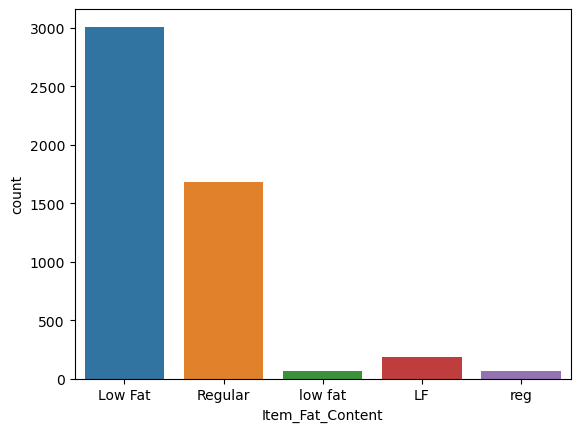

In [20]:
# Task 4. Lists item fat content
sns.countplot(x='Item_Fat_Content', data=Grc_df, hue='Item_Fat_Content')
plt.show()

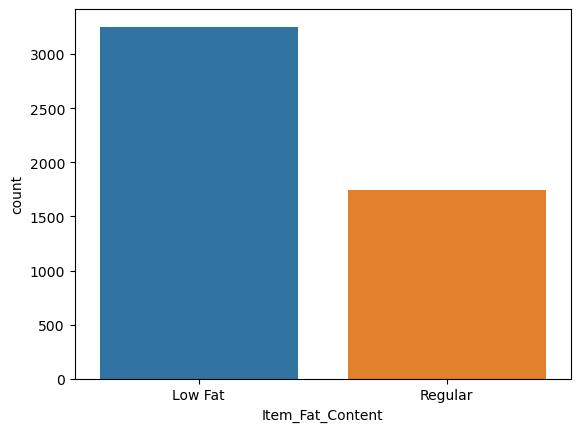

In [21]:
# Notice that there are 3 values that describe low fat, and 2 values that describe regular.
# Replaces the values to just one for each category and display the results
Grc_df['Item_Fat_Content'] = Grc_df['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})
sns.countplot(x='Item_Fat_Content', data=Grc_df, hue='Item_Fat_Content')
plt.show()

In [22]:
# Task 5
# Make Grc_new_df a copy of Grc_df. Display the columns
Grc_new_df = Grc_df
Grc_new_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [25]:
# Drop the columns having 0 and 6 as indexes.
Grc_new_df.drop(Grc_new_df.columns[[0,6]], axis=1, inplace=True)